# **Complete the 8 steps in this assignment and collect the screenshots. You will then enter your screenshots and answers to the questions in your answer sheet to submit to be graded.**


---



# Step 1: Set up your environment

To use H2O AutoML, we first need to install the necessary package.

📌 Run the following cell by clicking inside it and pressing Shift + Enter.
This will install H2O on Google Colab.

In [ ]:
!pip install h2o


Now, let's import the required libraries and start the H2O environment.

🔍
What does this do?

import h2o: Loads the H2O library, which contains AutoML tools.

h2o.init(): Starts the H2O environment inside Google Colab.





In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Initialize H2O
h2o.init()



---



# Step 2: Load and Explore the Dataset


For this exercise, we will use the Diamonds dataset, which contains information about diamond prices and attributes.
💎 What is the Diamonds Dataset?
The diamonds dataset is a collection of information about nearly 54,000 diamonds. Each row in the dataset represents a single diamond and describes several features about it—like its weight, color, and price.

This dataset is often used to practice machine learning because it’s easy to understand and contains both numerical and categorical data. It’s especially useful for predicting a diamond’s price based on its characteristics.
📌 Run the following cell to load the dataset:

In [ ]:
data_url = data_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

df = pd.read_csv(data_url)

#Display the first five rows
df.head()



🔍What does this do?

Downloads the dataset from the internet.

Loads it into a table using pandas (a popular data analysis tool).

Displays the first few rows to help us understand the data.

 What’s in the Dataset?
Each diamond is described by the following columns (or features):

Feature	What it means:
price	💰 The price of the diamond (in US dollars). This is the target variable we often want to predict.
carat	⚖️ The weight of the diamond. Larger diamonds usually cost more.
cut	✂️ Quality of the cut (e.g., Fair, Good, Very Good, Premium, Ideal). It affects how sparkly the diamond looks.
color	🎨 Diamond color grade, from D (best, colorless) to J (more yellow).
clarity	🔍 How clear the diamond is (fewer flaws = higher clarity). Ranges from I1 (lowest) to IF (internally flawless).
x	📏 Length of the diamond (in millimeters).
y	📐 Width of the diamond (in millimeters).
z	📐 Depth (height) of the diamond (in millimeters).
depth	📊 A calculated percentage: (z / average of x and y) × 100. It shows how deep the diamond is.
table	🔷 The width of the top of the diamond (as a percentage of its width).








---



# Step 3: Prepate the data for AutoML

H2O AutoML requires a special format, so we need to convert our dataset.

📌 Run the following cell to prepare the data:

In [ ]:
h2o_df = h2o.H2OFrame(df)

# Convert categorical columns to factors (AutoML needs this)
for col in ["cut", "color", "clarity"]:
    h2o_df[col] = h2o_df[col].asfactor()

# Define the target variable (what we want to predict) and features
target = "price"
predictors = [col for col in h2o_df.columns if col != target]

# Split into training and test data
train, test = h2o_df.split_frame(ratios=[0.8], seed=1234)

🔍 What does this do?

Converts our dataset into H2O's format for AutoML.

Changes categorical columns (like "cut", "color", "clarity") into a format that machine learning models understand.

Splits the dataset into training data (80%) and test data (20%).



---



# Step 4: Run H2O AutoML

Now, we let AutoML do the work! AutoML will train and compare multiple machine learning models to find the best one.

📌 Run the following cell to start training:

In [ ]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=predictors, y=target, training_frame=train)

🔍 What does this do?

Trains up to 10 different machine learning models on our data.

Automatically selects the best-performing model.

⏳ This step may take a 10-15 minutes to complete.



---



# Step 5: View the Best Model

Once training is complete, AutoML ranks the models using a leaderboard.


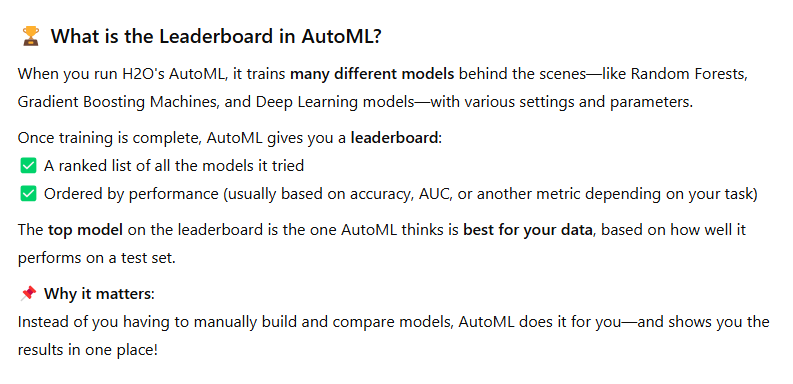


📌 Run this cell to see the leaderboard:

In [ ]:
aml.leaderboard


🔍 What does this show?

A list of models ranked by performance.

The best model (at the top) will be used for predictions.

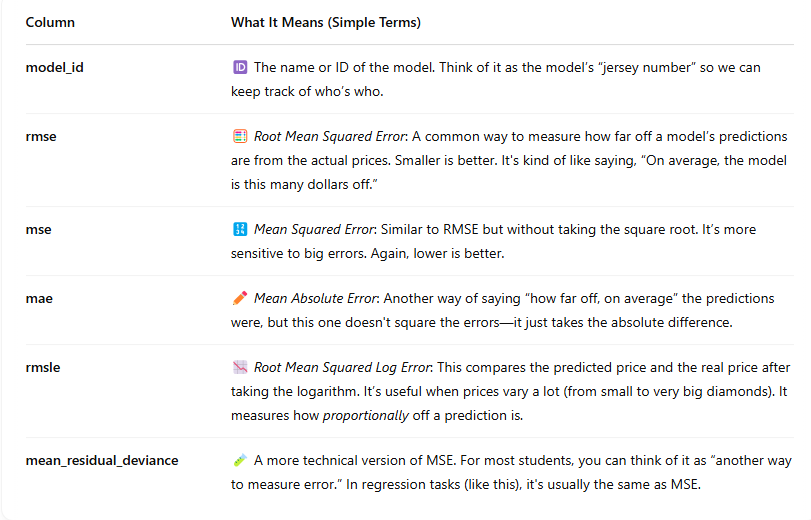



---



# Step 6: Make Predictions

Now that we have a trained model, let's use it to predict diamond prices.

📌 Run the following cell to make predictions on new data:

In [ ]:
# 1. Make predictions
preds = aml.leader.predict(test)

# 2. Convert predictions to pandas DataFrame for easier manipulation
preds_df = preds.as_data_frame()

# 3. Convert test data to pandas DataFrame
test_df = test.as_data_frame()

# 4. Combine predictions with original data
results_df = pd.concat([test_df, preds_df], axis=1)

# 5. Display the first 15 rows with all variables
results_df.head(15)

🔍 What does this do?

Uses the best model to predict diamond prices on our test data.

Displays the first 15 rows of  predictions.

What do you notice about the predictions? Does it make sense to you?



---



# Step 7: Evaluate Model Performance

To understand how well our model performs, we check its accuracy.

📌 Run the following cell to evaluate performance:

In [ ]:
aml.leader.model_performance(test)


🔍 What does this do?

Measures how well our model predicts prices.
Check out the table below to understand how the model performed.


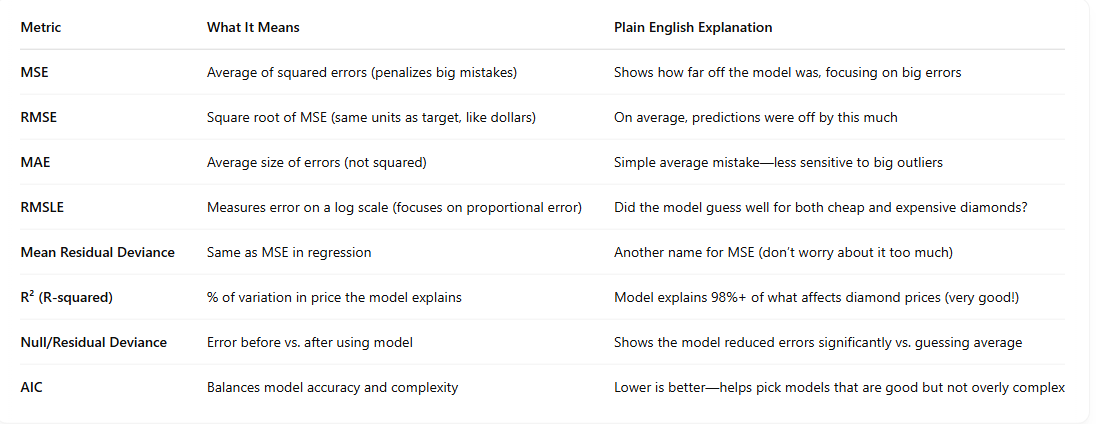



---



# Step 8: Take screenshots for your assignment

📸 Take screenshots of the following outputs and include them in your answer sheet:
✅ AutoML leaderboard ✅ Predictions on test data
✅ Model performance results
)


🎯 Great job! You have successfully used AutoML to train a machine learning model without writing complex code.